In [1]:
import pandas as pd

### load data

In [3]:
housing = pd.read_csv("Data/housing.csv")
anscombe = pd.read_csv("Data/anscombe.csv")
print(housing.head())
print("------")
print(anscombe.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
------
  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2 

### Analysis

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/zhangweilin/code/miniforge3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>

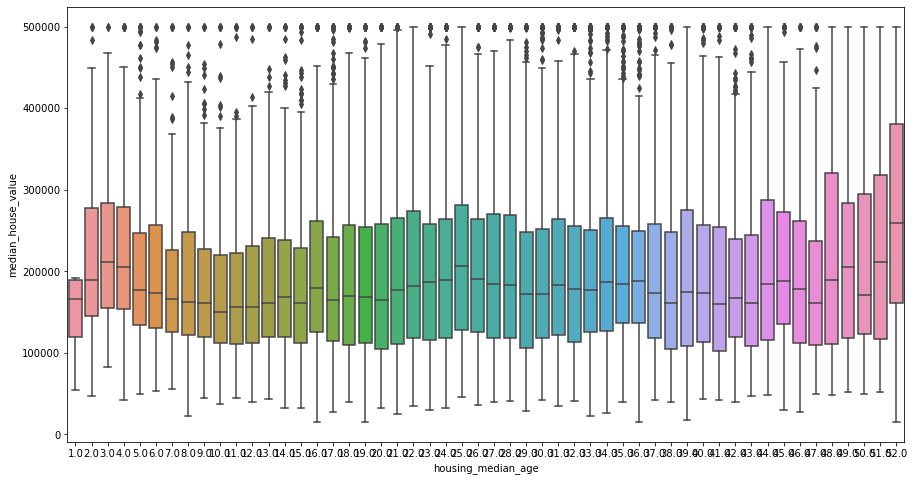

In [8]:
plt.figure(figsize=(15,8))
sns.boxplot(housing["housing_median_age"], housing["median_house_value"])

/Users/zhangweilin/code/miniforge3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

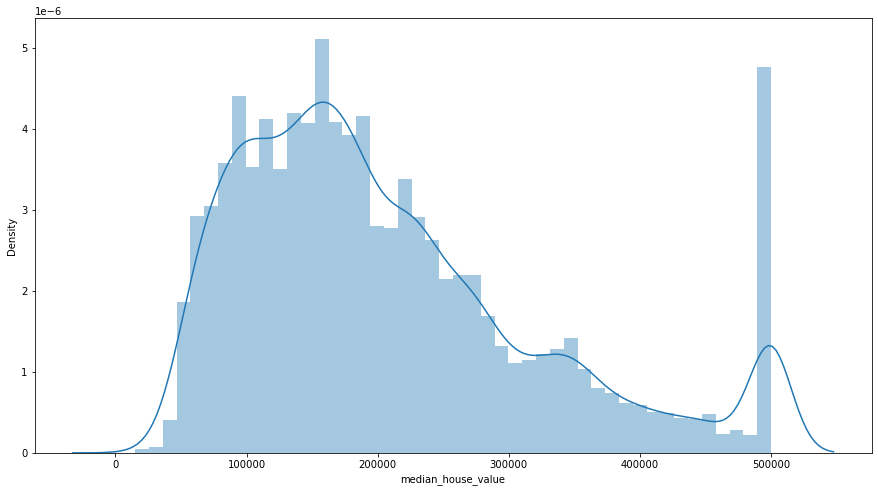

In [28]:
plt.figure(figsize=(15,8))
sns.distplot(housing["median_house_value"])

### data cleaning

In [13]:
print(housing.isnull().sum())
print(housing.shape)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
(20640, 10)


In [14]:
housing.dropna(axis=0,how='any', inplace=True)
print(housing.shape)

(20433, 10)


### correlation

In [15]:
# y = housing["median_house_value"]
# x = housing.drop(["median_house_value"], axis=1)

In [19]:
map_dict = {'<1H OCEAN':0, 'INLAND':1, 'ISLAND':2, 'NEAR BAY':3, 'NEAR OCEAN':4}
def map_fea(x):
    return map_dict[x]
    
housing["ocean_proximity"] = housing["ocean_proximity"].apply(map_fea)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


<AxesSubplot:>

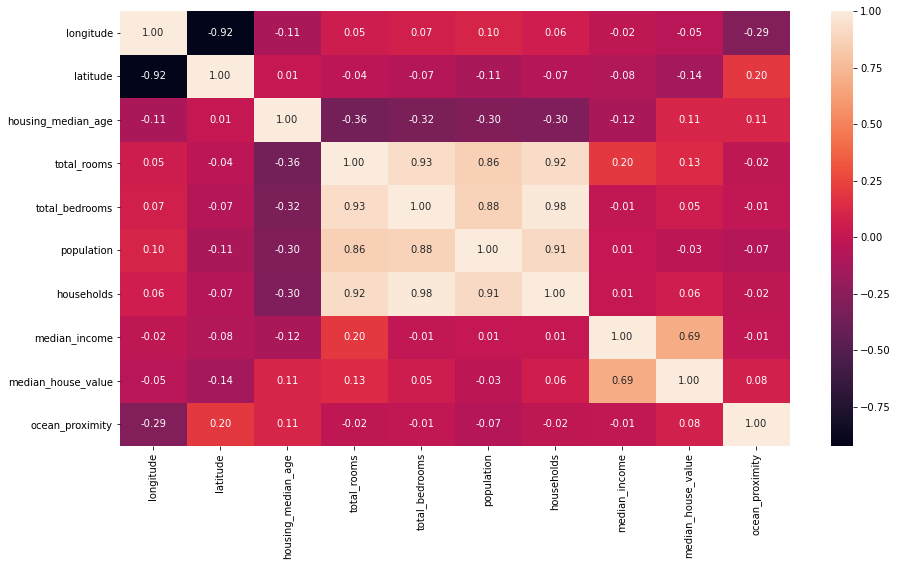

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(housing.corr(),annot=True,fmt=".2f")

### datasets

In [29]:
from sklearn.model_selection import train_test_split

y = housing["median_house_value"]
x = housing.drop(["median_house_value"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(x_train.shape)
print(x_test.shape)

(14303, 9)
(6130, 9)


### model

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [30]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.630256953011745

In [34]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
dt.score(x_test, y_test)

0.6275530191862486

In [36]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.8176456556318072